In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [6]:
# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/DiseaseAndSymptoms.csv')

# Combine symptom columns into a single text column
data['Symptoms'] = data[['Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4',
                         'Symptom_5', 'Symptom_6', 'Symptom_7', 'Symptom_8',
                         'Symptom_9', 'Symptom_10', 'Symptom_11', 'Symptom_12',
                         'Symptom_13', 'Symptom_14', 'Symptom_15', 'Symptom_16',
                         'Symptom_17']].apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1)

In [7]:
# Data preprocessing
data['Symptoms'] = data['Symptoms'].str.lower().str.replace('[^\w\s]', '')
X = data['Symptoms']
y = data['Disease']


In [8]:
# Split the data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [9]:
# Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vect = vectorizer.fit_transform(X_train)
X_val_vect = vectorizer.transform(X_val)
X_test_vect = vectorizer.transform(X_test)


In [10]:
# Model training functions
def train_model(model, X_train, y_train, X_val, y_val):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    cm = confusion_matrix(y_val, y_pred)
    report = classification_report(y_val, y_pred)
    return model, cm, report


In [11]:

# Naive Bayes
nb_model, nb_cm, nb_report = train_model(MultinomialNB(), X_train_vect, y_train, X_val_vect, y_val)

In [12]:
# Support Vector Machine
svm_model, svm_cm, svm_report = train_model(SVC(), X_train_vect, y_train, X_val_vect, y_val)

In [13]:
# Random Forest
rf_model, rf_cm, rf_report = train_model(RandomForestClassifier(), X_train_vect, y_train, X_val_vect, y_val)

In [14]:
# Neural Network
nn_model, nn_cm, nn_report = train_model(MLPClassifier(), X_train_vect, y_train, X_val_vect, y_val)

In [15]:
# Save models and vectorizer
joblib.dump(vectorizer, '/content/drive/MyDrive/ModelsChat/tfidf_vectorizer.pkl')
joblib.dump(nb_model, '/content/drive/MyDrive/ModelsChat/nb_model.pkl')
joblib.dump(svm_model, '/content/drive/MyDrive/ModelsChat/svm_model.pkl')
joblib.dump(rf_model, '/content/drive/MyDrive/ModelsChat/rf_model.pkl')
joblib.dump(nn_model, '/content/drive/MyDrive/ModelsChat/nn_model.pkl')

['/content/drive/MyDrive/ModelsChat/nn_model.pkl']

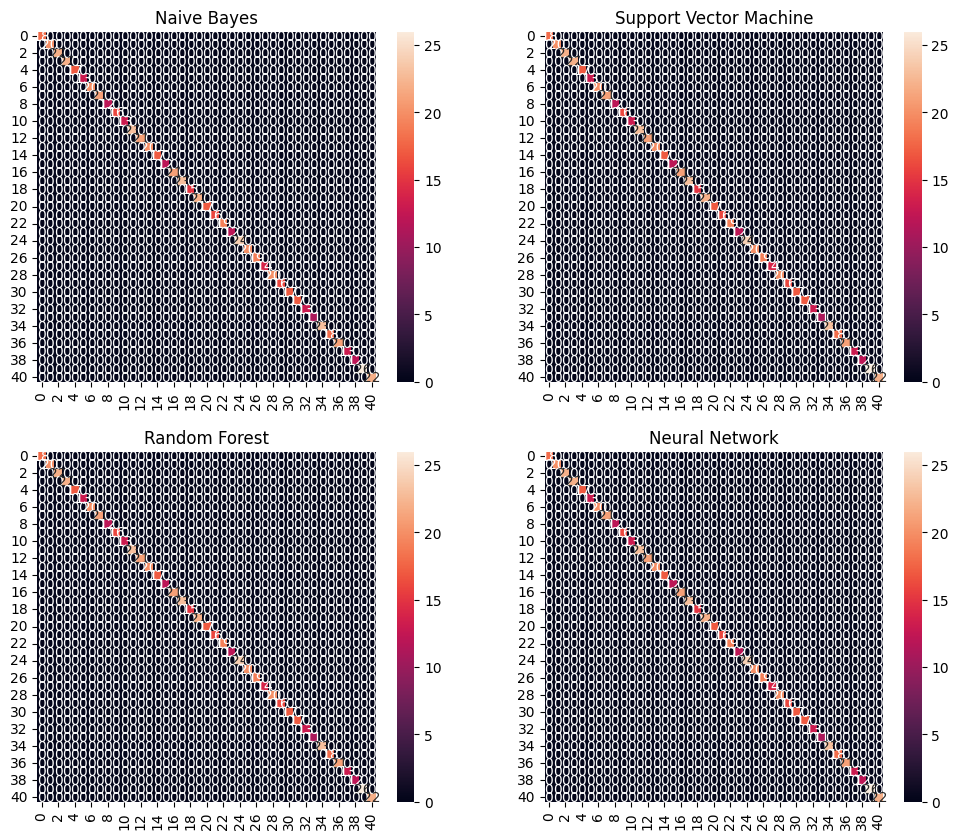

In [16]:
# Plot confusion matrices
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
sns.heatmap(nb_cm, annot=True, fmt='d', ax=axs[0, 0])
axs[0, 0].set_title('Naive Bayes')
sns.heatmap(svm_cm, annot=True, fmt='d', ax=axs[0, 1])
axs[0, 1].set_title('Support Vector Machine')
sns.heatmap(rf_cm, annot=True, fmt='d', ax=axs[1, 0])
axs[1, 0].set_title('Random Forest')
sns.heatmap(nn_cm, annot=True, fmt='d', ax=axs[1, 1])
axs[1, 1].set_title('Neural Network')
plt.show()

In [18]:
# Function to evaluate the model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    report = classification_report(y_test, y_pred)
    return accuracy, precision, recall, f1, report

# Evaluate Naive Bayes
nb_accuracy, nb_precision, nb_recall, nb_f1, nb_report = evaluate_model(nb_model, X_test_vect, y_test)
print("Naive Bayes Classification Report")
print("Accuracy:", nb_accuracy)
print("Precision:", nb_precision)
print("Recall:", nb_recall)
print("F1 Score:", nb_f1)
print(nb_report)

# Evaluate Support Vector Machine
svm_accuracy, svm_precision, svm_recall, svm_f1, svm_report = evaluate_model(svm_model, X_test_vect, y_test)
print("\nSupport Vector Machine Classification Report")
print("Accuracy:", svm_accuracy)
print("Precision:", svm_precision)
print("Recall:", svm_recall)
print("F1 Score:", svm_f1)
print(svm_report)

# Evaluate Random Forest
rf_accuracy, rf_precision, rf_recall, rf_f1, rf_report = evaluate_model(rf_model, X_test_vect, y_test)
print("\nRandom Forest Classification Report")
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1 Score:", rf_f1)
print(rf_report)

# Evaluate Neural Network
nn_accuracy, nn_precision, nn_recall, nn_f1, nn_report = evaluate_model(nn_model, X_test_vect, y_test)
print("\nNeural Network Classification Report")
print("Accuracy:", nn_accuracy)
print("Precision:", nn_precision)
print("Recall:", nn_recall)
print("F1 Score:", nn_f1)
print(nn_report)

Naive Bayes Classification Report
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        14
                                   AIDS       1.00      1.00      1.00        19
                                   Acne       1.00      1.00      1.00        19
                    Alcoholic hepatitis       1.00      1.00      1.00        14
                                Allergy       1.00      1.00      1.00        18
                              Arthritis       1.00      1.00      1.00        23
                       Bronchial Asthma       1.00      1.00      1.00        24
                   Cervical spondylosis       1.00      1.00      1.00        11
                            Chicken pox       1.00      1.00      1.00        23
                    Chronic cholestasis       1.00      1.00      1.00        14
                   